# Analysis on TS September Spotify Dataset of all Songs

- Dataset link: https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset?select=taylor_swift_spotify.csv
  - Includes explanation of all feature signifcances


## Data Cleaning / EDA


In [2]:
import pandas as pd

df = pd.read_csv("data/taylor_swift_spotify.csv") # last update in early August 2023 (popularity based on spotify rankings then; not overall)
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1,7G0gBu6nLdhFDPRLc0HdDG,spotify:track:7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.171,-2.846,0.0356,121.080,0.490,89,231706
1,1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,2,3MytWN8L7shNYzGl4tAKRp,spotify:track:3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.131,-2.347,0.0305,114.991,0.387,88,261230
2,2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,79uDOz0zuuWS7HWxzMmTa2,spotify:track:79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,0.203,90,294189
3,3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,4,5xXqyjLicvEpch72qEryFT,spotify:track:5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,0.639,87,242473
4,4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5,1zU8j1x3yi9xalMF96pzKp,spotify:track:1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.163,-5.016,0.0296,119.294,0.133,87,405906


In [3]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [4]:
df.shape # pretty small sample size, all thing relative

(476, 18)

In [5]:
df.drop(["Unnamed: 0", "uri"], inplace=True, axis=1)
df.head()

,name,album,release_date,track_number,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1,7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.171,-2.846,0.0356,121.080,0.490,89,231706
1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,2,3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.131,-2.347,0.0305,114.991,0.387,88,261230
2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,0.203,90,294189
3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,4,5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,0.639,87,242473
4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5,1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.163,-5.016,0.0296,119.294,0.133,87,405906


In [6]:
df.album.unique()

array(["Speak Now (Taylor's Version)", 'Midnights (The Til Dawn Edition)',
       'Midnights (3am Edition)', 'Midnights', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'evermore',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'folklore (deluxe version)', 'folklore', 'Lover', 'reputation',
       'reputation Stadium Tour Surprise Song Playlist', '1989 (Deluxe)',
       '1989', 'Red (Deluxe Edition)', 'Speak Now World Tour Live',
       'Speak Now', 'Speak Now (Deluxe Package)',
       'Fearless (Platinum Edition)', 'Fearless (International Version)',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

In [7]:
df = df[df.album.isin(["folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]", "reputation Stadium Tour Surprise Song Playlist", "Speak Now World Tour Live", "Live From Clear Channel Stripped 2008"]) == False]

In [8]:
df.album.unique()

array(["Speak Now (Taylor's Version)", 'Midnights (The Til Dawn Edition)',
       'Midnights (3am Edition)', 'Midnights', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'evermore', 'folklore (deluxe version)', 'folklore', 'Lover',
       'reputation', '1989 (Deluxe)', '1989', 'Red (Deluxe Edition)',
       'Speak Now', 'Speak Now (Deluxe Package)',
       'Fearless (Platinum Edition)', 'Fearless (International Version)',
       'Taylor Swift'], dtype=object)

In [9]:
df.loc[df["album"].isin(["Midnights (The Til Dawn Edition)", "Midnights (3am Edition)"]), "album"] = "Midnights"

df.loc[df['album'] == 'folklore (deluxe version)', "album"] = "folklore"

df.loc[df["album"] == "evermore (deluxe version)", "album"] = "evermore"

df.loc[df["album"] == "1989 (Deluxe)", "album"] = "1989"

df.loc[df["album"] == 'Speak Now (Deluxe Package)', "album"] = "Speak Now"

df.loc[df["album"] == 'Red (Deluxe Package)', "album"] = "Red"

df.loc[df["album"].isin(["Fearless (International Version)", "Fearless (Platinum Edition)"]), "album"] = "Fearless"

In [10]:
features = ['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms']

df.drop_duplicates(subset=features, keep='first', inplace=True) # this will drop songs that have different categories like folklore: the long pond studio sessions vs folklore: deluxe version but the same name

In [11]:
df["album"].unique()

array(["Speak Now (Taylor's Version)", 'Midnights',
       "Red (Taylor's Version)", "Fearless (Taylor's Version)",
       'evermore', 'folklore', 'Lover', 'reputation', '1989',
       'Red (Deluxe Edition)', 'Speak Now', 'Fearless', 'Taylor Swift'],
      dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 475
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              345 non-null    object 
 1   album             345 non-null    object 
 2   release_date      345 non-null    object 
 3   track_number      345 non-null    int64  
 4   id                345 non-null    object 
 5   acousticness      345 non-null    float64
 6   danceability      345 non-null    float64
 7   energy            345 non-null    float64
 8   instrumentalness  345 non-null    float64
 9   liveness          345 non-null    float64
 10  loudness          345 non-null    float64
 11  speechiness       345 non-null    float64
 12  tempo             345 non-null    float64
 13  valence           345 non-null    float64
 14  popularity        345 non-null    int64  
 15  duration_ms       345 non-null    int64  
dtypes: float64(9), int64(3), object(4)
memory us

# Tracks vs Popularity

- What's associated with track popularity?
- What were the most popular tracks generally and per album?


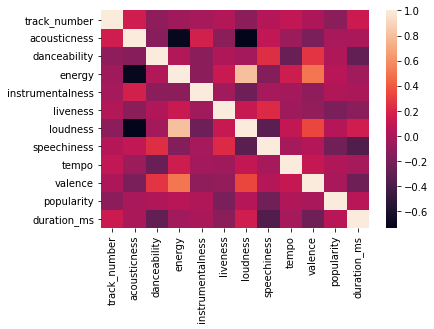

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

In [14]:
df.corr()["popularity"].sort_values(ascending=False)

popularity          1.000000
energy              0.058462
duration_ms         0.053504
loudness            0.035260
tempo               0.016573
danceability        0.014628
instrumentalness    0.012576
acousticness       -0.011501
valence            -0.012696
track_number       -0.129463
liveness           -0.194632
speechiness        -0.235326
Name: popularity, dtype: float64

In [15]:
df.nlargest(10, "popularity")

,name,album,release_date,track_number,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
234,Cruel Summer,Lover,2019-08-23,2,1BxfuPKGuaTgP7aM0Bbdwr,0.11700,0.552,0.702,0.000021,0.1050,-5.707,0.1570,169.994,0.5640,99,178426
67,Anti-Hero,Midnights,2022-10-21,3,0V3wPSX9ygBnCm8psDIegu,0.13000,0.637,0.643,0.000002,0.1420,-6.571,0.0519,97.008,0.5330,94,200690
18,I Can See You (Taylor’s Version) (From The Vault),Speak Now (Taylor's Version),2023-07-07,19,5kHMfzgLZP95O9NBy0ku4v,0.05860,0.694,0.764,0.000000,0.0608,-4.893,0.0337,123.044,0.8190,93,273186
218,cardigan,folklore,2020-07-24,2,4R2kfaDFhslZEMJqAFNpdd,0.53700,0.613,0.581,0.000345,0.2500,-8.588,0.0424,130.033,0.5510,92,239560
75,Karma,Midnights,2022-10-21,11,7KokYm8cMIXCsGVmUvKtqf,0.07340,0.642,0.620,0.000000,0.4830,-7.091,0.0666,90.020,0.0969,91,204852
235,Lover,Lover,2019-08-23,3,1dGr1c8CrMLDpV6mPbImSI,0.49200,0.359,0.543,0.000016,0.1180,-7.582,0.0919,68.534,0.4530,91,221306
254,Don’t Blame Me,reputation,2017-11-10,4,1R0a2iXumgCiFb7HEZ7gUE,0.10600,0.615,0.534,0.000018,0.0607,-6.719,0.0386,135.917,0.1930,91,236413
313,Blank Space,1989,2014-01-01,2,1u8c2t2Cy7UBoG4ArRcF5g,0.10300,0.760,0.703,0.000000,0.0913,-5.412,0.0540,95.997,0.5700,91,231826
314,Style,1989,2014-01-01,3,0ug5NqcwcFR2xrfTkc7k8e,0.00245,0.588,0.791,0.002580,0.1180,-5.595,0.0402,94.933,0.4870,91,231000
2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.1170,-3.927,0.0273,142.063,0.2030,90,294189


In [16]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

In [17]:
df.sort_values(['release_year'],ascending=False)[["album", "release_year"]].value_counts() # discreptencies in albums release dates due to deluxes 

album                         release_year
Fearless                      2008            35
folklore                      2020            33
Midnights                     2022            33
1989                          2014            32
Red (Taylor's Version)        2021            30
Fearless (Taylor's Version)   2021            26
Speak Now                     2010            24
Midnights                     2023            23
Speak Now (Taylor's Version)  2023            22
Red (Deluxe Edition)          2012            22
Lover                         2019            18
evermore                      2021            17
reputation                    2017            15
Taylor Swift                  2006            15
dtype: int64

In [18]:
df.loc[df["album"]=="Midnights", ["release_year"]] = 2022
df.loc[df["album"]=="evermore", ["release_year"]] = 2020

In [19]:
df.sort_values(by=['release_year', 'album', 'popularity'], ascending=[True, True, False]).groupby(["album"]).head(3)[["name", 'release_year', "popularity"]]

,name,release_year,popularity
471,Our Song,2006,71
462,Picture To Burn,2006,68
463,Teardrops On My Guitar - Radio Single Remix,2006,67
426,Love Story,2008,63
429,You Belong With Me,2008,63
433,The Way I Loved You,2008,59
390,Enchanted,2010,82
384,Back To December,2010,75
391,Better Than Revenge,2010,71
347,I Knew You Were Trouble.,2012,66


## Are more recent songs more popular?

- correlation =/= causation, but perhaps recency bias / more popularity now so people access newer songs more?


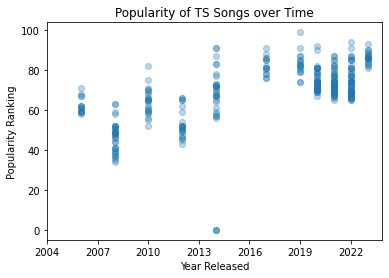

In [20]:
# scatterplot --> popularity over time --> mess w/ alpha value
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.scatter(df["release_year"], df["popularity"], alpha=0.3)
ax.set_xticks([i for i in range(2004, 2025, 3)])
ax.set_title("Popularity of TS Songs over Time")
ax.set_ylabel("Popularity Ranking")
ax.set_xlabel("Year Released")
plt.show()

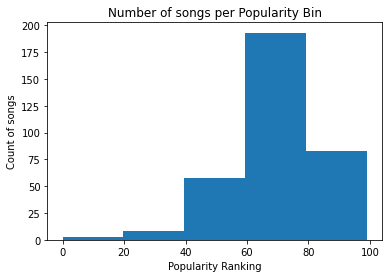

In [21]:
# histogram: popularity bins count in general
plt.hist(df["popularity"], bins=5)
plt.title("Number of songs per Popularity Bin")
plt.ylabel("Count of songs")
plt.xlabel("Popularity Ranking")
plt.show()

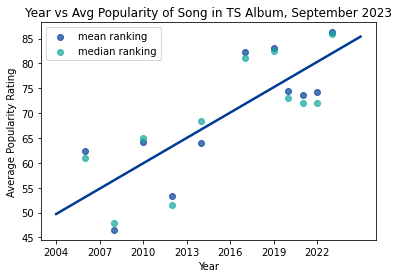

In [22]:
# average rating over time --> recency bias?

years = df["release_year"].unique()
avg_ratings = []
median_ratings = []
for year in years:
    avg_ratings.append(df.loc[df["release_year"] == year, "popularity"].mean())
    median_ratings.append(df.loc[df["release_year"] == year, "popularity"].median())

# finding m, b of line of best fit
m_mean, b_mean = np.polyfit(years, avg_ratings, deg=1)
m_median, b_median = np.polyfit(years, median_ratings, deg=1)
# x sequence to predict on
xseq = np.linspace(2004, 2025, num=21)

fig, ax = plt.subplots()

ax.scatter(years, avg_ratings, c="#003C96", alpha=0.7, label="mean ranking")
ax.scatter(years, median_ratings, c="#11A69C", alpha=0.7, label="median ranking")

# no signifcant difference between mean, median ratings, so only mean rating best fit plotted
ax.plot(xseq, b_mean + m_mean * xseq, color="#003C96", lw=2.5)

ax.set_xticks([i for i in range(2004, 2025, 3)])
ax.set_title("Year vs Avg Popularity of Song in TS Album, September 2023")
ax.set_xlabel("Year")
ax.set_ylabel("Average Popularity Rating")
ax.legend()

plt.show()

In [23]:
print("Correlation Coefficient: ", round(np.corrcoef(avg_ratings, years)[0][1], 2))

Correlation Coefficient:  0.8


## Can popularity be predicted?

### Basic outline of models to be optimized

- multi-variable regression
  - regular
  - lasso (L1 regularization, added a factor of the absolute sum of coefficients)
    - shrinks unimportant coefficients to 0
  - ridge (L2 regularization, adds a factor of sum of squares of coefficients)
    - shrinks unimportant coefficients to almost, but not quite 0
  - elastic net: combines both
- regression tree
  - random forest
    - combine to get average
  - gradient boosted
    - build bunch of new learners to train on mistakes of previous
    - sensitive to outliers!
- suppor vector regression
  - likely that data is sparse (not great for SVR), but lots of features


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = df[['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms']]
y = df["popularity"]

X, y = shuffle(X, y, random_state=42) # v important

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_preds = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_reg_preds)
lin_mse # pretty high... perhaps not a complex enough model for this

206.131212041867

In [26]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(random_state=42)
# alpha = regularization strength (higher = stronger regularization)
# l1_ratio: ratio of L1 to L2 penalties (0.5 = equal mix)
elastic_net.fit(X_train, y_train)

elastic_net_preds = elastic_net.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_net_preds)
elastic_mse # suprisingly worse than linear regression... 

216.99744161954365

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

tree_reg_preds = tree_reg.predict(X_test)
tree_reg_mse = mean_squared_error(y_test, tree_reg_preds)
tree_reg_mse # most likely overfitting... needs to use cross validation

339.27536231884056

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

forest_reg_preds = forest_reg.predict(X_test)
forest_reg_mse = mean_squared_error(y_test, forest_reg_preds)
forest_reg_mse # most accurate 

156.61461449275356

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_reg = GradientBoostingRegressor(random_state=42)
boosting_reg.fit(X_train, y_train)

boosting_preds = boosting_reg.predict(X_test)
boosting_mse = mean_squared_error(y_test, boosting_preds)
boosting_mse # most likely outliers affecting it...

162.82332657163394

In [30]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

svr_preds = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_mse

210.171283937337

### Problems to consider and Solutions:

| Problem                    | Solution                                                                                                                             |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| Random vs stratified split | <ul> <li>Random - more representative of real world</li> <li>Don't want recency bias being the leading predictive feature</li> </ul> |
| Overfitting / underfitting | Avoid too complicated models, use regularization parameters                                                                          |
| How to optimize paramters  | Grid Search: auto-validation and optimization                                                                                        |
| Very little samples        | Opt toward simpler models                                                                                                            |


In [31]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, 
                           scoring="neg_mean_absolute_error", 
                           return_train_score=True,
                           n_jobs=-1,
                        )

    grid_search.fit(X_train, y_train)

    return grid_search

In [32]:
# finding the ideal optimization for decision tree
tree_param_grid = [
    {'min_samples_split': [2, 30, 35, 40, 50, 60], 'max_features': [None, "auto"], 'min_impurity_decrease': [0.0, 0.25, 0.5], "min_samples_leaf": [1, 5, 11, 12, 15]}
]

tree_reg = DecisionTreeRegressor(random_state=42)

tree_GD = grid_search(tree_reg, tree_param_grid)

tree_GD.best_params_, tree_GD.best_score_

({'max_features': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 60},
 -10.926429387671835)

In [33]:
forest_param_grid = [
    {'min_samples_split': [2, 10, 20, 30, 35], 'min_samples_leaf': [10, 12, 15, 20], "n_estimators": [i for i in range(10, 100, 15)]},
]

forest_reg = RandomForestRegressor(random_state=42)

forest_GD = grid_search(forest_reg, forest_param_grid)

forest_GD.best_params_, forest_GD.best_score_

({'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 40},
 -10.019912323502915)

In [34]:
boosting_params = [
    {'min_samples_split': [2, 5, 10, 20, 30], 'min_samples_leaf': [2, 5, 10, 15, 30], "learning_rate": [0.01, 0.05, 0.1, 0.5, 1], "n_estimators": [i for i in range(10, 100, 15)]}
]

boosting_reg = GradientBoostingRegressor(random_state=42, tol=0.1, n_iter_no_change=10)

boosting_GD = grid_search(boosting_reg, boosting_params)

boosting_GD.best_params_, boosting_GD.best_score_

({'learning_rate': 0.1,
  'min_samples_leaf': 2,
  'min_samples_split': 30,
  'n_estimators': 55},
 -9.656890634939218)

In [54]:
import sys
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore") # need this line of code or the filterwarnings later on doesn't work...

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    sys.stderr = open(os.devnull, "w")  # Redirect stderr to null

    elastic_params = [
        {'alpha': [0, 0.25, 0.5, 0.75, 1], 'l1_ratio': [0.25, 0.5, 0.75], "max_iter": [1000, 1500, 2000], 'tol':[0, 0.0001, 0.001, 0.01, 0.1, 0.2]}
    ]

    elastic_reg = ElasticNet(random_state=42)

    elastic_GD = grid_search(elastic_reg, elastic_params)

    sys.stderr = sys.__stderr__ # restore stderr
elastic_GD.best_params_, elastic_GD.best_score_


({'alpha': 1, 'l1_ratio': 0.75, 'max_iter': 1000, 'tol': 0.2},
 -10.76886054198631)

In [36]:
svr_params = [
    {"kernel": ["rbf", "poly", "linear"], "degree": [1, 2, 3, 4, 5], "C":[0.1, 0.5, 1]}
] 

svr = SVR()

svr_GD = grid_search(svr, svr_params)

svr_GD.best_params_, svr_GD.best_score_

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3792381398379803e-09, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3792381398379803e-09, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


({'C': 0.5, 'degree': 5, 'kernel': 'poly'}, -10.210100585078468)

### Gradient Boosting performed the best

- Let's predict using it!


In [37]:
boosting_reg = GradientBoostingRegressor(random_state=42, min_samples_leaf=2, min_samples_split=30, n_estimators=55, learning_rate=0.1)

boosting_reg.fit(X_train, y_train)

boosting_preds = boosting_reg.predict(X_test)
mean_squared_error(y_test, boosting_preds)

171.77118581429113

### Possible reasons gradient boosting appears to be less accurate on testing set than general models

| Reason       | Explanation                                                                                                                                                                                                                                                                     |
| ------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Limited data | With roughly 300 samples (and only 240 to train on), their is random variation between training, validation, and testing data may cause poor generalization <ul><li>Like if test data held songs mostly from more recent years...</li><li>most likely largest culprit</li></ul> |
| Overfitting  | Possibility, but use of cross-validation and regularization parameters should've curbed it to a large extent                                                                                                                                                                    |


## Predictions and Conclusions


### What features were deemed the most important?


In [38]:
feature_importances_df = pd.DataFrame({"Feature": X_train.columns, "Importance (based on gini impurity)": [round(i, 3) for i in boosting_reg.feature_importances_]})
sorted_importances = feature_importances_df.sort_values(by='Importance (based on gini impurity)', ascending=False)

sorted_importances # didn't expect speechiness to be up there

,Feature,Importance (based on gini impurity)
5,loudness,0.372
6,speechiness,0.318
4,liveness,0.081
2,energy,0.063
0,acousticness,0.047
1,danceability,0.039
9,duration_ms,0.032
8,valence,0.020
7,tempo,0.016
3,instrumentalness,0.011


### The MSE is a good numeric measure... but it's hard to visualize.

- How do the predictions compare on data from different songs?


In [39]:
songs_for_predictions = ["Blank Space", "Cruel Summer", "Anti-Hero", "We Are Never Ever Getting Back Together (Taylor's Version)"]
data_rows = df.loc[df['name'].isin(songs_for_predictions)]
data_rows = data_rows.sort_values("release_date").drop_duplicates("name", keep="first")
x_features = data_rows[['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms']]
y_actual = data_rows["popularity"]
y_pred = boosting_reg.predict(x_features)
difference = y_pred - y_actual

results = pd.DataFrame({"Song": songs_for_predictions, "Popularity predictions": y_pred, "Popularity Actual": y_actual, "Difference (pred - true)": difference})

results

,Song,Popularity predictions,Popularity Actual,Difference (pred - true)
313,Blank Space,75.254244,91,-15.745756
234,Cruel Summer,74.022528,99,-24.977472
85,Anti-Hero,77.477019,82,-4.522981
67,We Are Never Ever Getting Back Together (Taylo...,76.999561,94,-17.000439


### Curious Qs

- Just stuff I'm wondering


#### CQ1

- What songs were predicted to be the most and least popular? What were their actual rankings?
  - Need new predictions since previous were only on X_test


In [40]:
X_all = pd.concat([X_test, X_train])
features = ['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms']

corr_rows = X_all.merge(df, how='inner', on=features, sort=False)
song_names = corr_rows["name"]
all_song_popularities = corr_rows["popularity"]

boosting_reg_all = GradientBoostingRegressor(random_state=42, min_samples_leaf=2, min_samples_split=30, n_estimators=55, learning_rate=0.1)
boosting_reg_all.fit(X_train, y_train)
all_preds = boosting_reg_all.predict(X_all)

# actual_results = corr_rows["popularity"]
zipped_list = zip(all_preds, song_names, all_song_popularities)
most_popular = sorted(zipped_list, reverse=True, key=lambda x: x[0])[:5]
zipped_list = zip(all_preds, song_names, all_song_popularities)
least_popular = sorted(zipped_list, reverse=False, key=lambda x: x[0])[:5]

In [41]:
pd.DataFrame({"Song": [row[1] for row in most_popular], "Predicted Popularity": [round(row[0], 2) for row in most_popular], "Actual Popularity": [row[2] for row in most_popular]}) # interesting that none of these are singles

,Song,Predicted Popularity,Actual Popularity
0,The Story Of Us (Taylor's Version),87.47,86
1,Haunted,84.49,65
2,Haunted (Taylor's Version),83.08,85
3,Long Live (Taylor's Version),81.04,86
4,The Archer,80.38,83


In [42]:
pd.DataFrame({"Song": [row[1] for row in least_popular], "Predicted Popularity": [round(row[0], 2) for row in least_popular], "Actual Popularity": [row[2] for row in least_popular]}) 

,Song,Predicted Popularity,Actual Popularity
0,I Know Places - Voice Memo,6.79,0
1,I Wish You Would - Voice Memo,7.95,0
2,Tell Me Why,49.21,36
3,You're Not Sorry,49.25,37
4,State Of Grace - Acoustic,49.35,46


#### CQ2

- What is the range on the predictions?
  - I have hunch the model is predicting near the average popularity score every time...


In [43]:
min(all_preds), max(all_preds)

(6.787449375861056, 87.47193569811401)

In [44]:
all_song_popularities.mean(), np.median(all_song_popularities)

(69.42608695652174, 71.0)

In [45]:
all_preds.mean(), np.median(all_preds) # v likely that it's literally doing predicting around the mean it seems...

(69.15908990509351, 70.35432881765009)

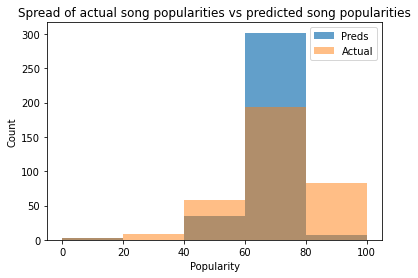

In [46]:
plt.hist(all_preds, alpha=0.7, bins=[0, 20, 40, 60, 80, 100], label="Preds")
plt.hist(all_song_popularities, alpha=0.5, bins=[0, 20, 40, 60, 80, 100], label="Actual")
plt.legend(loc="upper right")
plt.title("Spread of actual song popularities vs predicted song popularities")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()
# does, indeed, appear to be moslty predicting in that 60-80 range... (aka around the mean/median)

#### CQ3

- What would the error be if we just predicted mean every time?


In [47]:
mse_preds = mean_squared_error(all_preds,all_song_popularities)
mse_only_mean_preds = mean_squared_error([69.43 for i in range(0, len(all_preds))], all_song_popularities)

print("Model predictions MSE: ", mse_preds)
print("Only predicting the mean MSE: ", mse_only_mean_preds)
print("Difference: ", (mse_only_mean_preds - mse_preds)) # so the model does do significantly better than just average 

Model predictions MSE:  95.20258752550359
Only predicting the mean MSE:  200.8590449275362
Difference:  105.6564574020326


### CQ4


- What songs are deemed similar?
  - Based on technical similarities (e.g. energy) rather than more abstract ones like mood
  - Clustering!
    - K-means clustering (centroid-based)
    - DBSCAN (density-based)


In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score # measures how similar an object is to its own cluster compared to others (score=1 indicated well-matched, score=-1 indicates that a point may match better to another cluster)

eps_values = np.linspace(1, 3000, 100) # through previous iterations - difference in s score not terribly different if their are 100 or 200 eps values; runtime is the only major difference
min_sample_values = np.linspace(5, 100, 20)

best_labels = None
best_score = 0
best_vals = None
best_model = None

for eps in eps_values:
    for min_sample in min_sample_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample, metric='manhattan') # manhattan because of high dimensiality, suspected array sparseness
        labels = dbscan.fit_predict(X_all)
        if len(np.unique(labels)) > 3: # want at least 3 sep clusters
            silhouette_avg = silhouette_score(X_all, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_val = [eps, min_sample]
                best_labels = labels
                best_model = dbscan

print("Best silhouette score: ", max)
print("Best epsilon value and min samples: ", best_val)

n_clusters_ = len(set(best_labels)) - (1 if -1 in labels else 0)
n_noise_ = list(best_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Best silhouette score:  <built-in function max>
Best epsilon value and min samples:  [2030.6262626262628, 5.0]
Estimated number of clusters: 8
Estimated number of noise points: 47


In [49]:
def get_names_in_cluster(cluster_label):
    indices = np.where(best_labels == cluster_label)[0]
    selected_rows = corr_rows.iloc[indices]["name"]

    return pd.DataFrame(data=selected_rows.to_list(), columns=[cluster_label])

In [50]:
get_names_in_cluster(-1).head(25) # songs that didn't belong to any cluster

,-1
0,All Too Well (10 Minute Version) (Taylor's Ver...
1,Last Kiss (Taylor's Version)
2,Blank Space - Voice Memo
3,Last Kiss
4,The Last Time (feat. Gary Lightbody of Snow Pa...
5,epiphany
6,Cruel Summer
7,Dear John
8,happiness
9,Dear John (Taylor's Version)


In [51]:
get_names_in_cluster(0).head(25) # cluster 1

,0
0,King Of My Heart
1,Invisible
2,Gorgeous
3,Shake It Off
4,Lavender Haze
5,Dear Reader
6,Stay Stay Stay (Taylor's Version)
7,mirrorball
8,The Outside
9,Question...?


In [52]:
get_names_in_cluster(1).head(25) # cluster 2 

,1
0,Delicate
1,Tim McGraw
2,mad woman
3,I Did Something Bad
4,Labyrinth
5,Labyrinth
6,Haunted
7,Out Of The Woods
8,The Other Side Of The Door (Taylor’s Version)
9,Everything Has Changed


### Conclusion

| Question                                                              | Answer                                                                                                                                                                                                                                                                                                                                                                            |
| --------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Can song popularity be predicted based on the spotify given features? | <ul><li>To some extent, yes, but not very reliably</li><li>TS's general popularity with the public is more likely a bigger indicator</li><li>Other important factors that weren't considered here but could have a large effect are the mood of the song (ex: sad, happy, angry), over-arching theme (ex: breakup, love), and genre (ex: ultra pop, country-ish, indie)</li></ul> |
| Will future TS songs be, on average, more popular than current ones?  | <ul><li>Trendline says yes</li><li>But it again depends on general popularity of TS more so than the song numerical features</li></ul>                                                                                                                                                                                                                                            |
| Of the features tested, which ones were the most important?           | <ul><li>Loudness, speechiness, and liveness, respectively</li></ul>                                                                                                                                                                                                                                                                                                               |
| What do the songs clustered look like?                                | <ul><li>Long story short: messy</li><li>Again, solely using technical aspects of a song seem to be a poor indicator of important song characteristics that would affect groupings (ex: I Did Something Bad and Tied Together With A Smile are placed in the same cluster despite being clearly different)</li></ul>                                                               |
